# Oppgave 4: Feilhåndtering og fildata
## 4.1
### a)

In [77]:
import numpy as np

def bufferpH(pKa, c_base, c_syre):
    pH = pKa + np.log10(c_base/c_syre)
    return pH

pKa = float(input("pKa: "))
c1 = float(input("Basekonsentrasjonen i mol/L: "))
c2 = float(input("Syrekonsentrasjonen i mol/L: "))

pH = bufferpH(pKa,c1,c2)
print(f"pH-en i bufferen er {pH:.2f}")

pKa: 4.76
Basekonsentrasjonen i mol/L: 2.0E-3
Syrekonsentrasjonen i mol/L: 2.3E-3
pH-en i bufferen er 4.70


### b) 
Her får vi ikke demonstrert output fordi programmet må kjøres gjennom en kommandolinje, men programmet nedenfor vil fungerer ved at du skriver følgende i en Unix-terminal:

In [82]:
import numpy as np
import sys

def bufferpH(pKa, c_base, c_syre):
    pH = pKa + np.log10(c_base/c_syre)
    return pH

pKa = sys.argv[1]
c1 = sys.argv[2]
c2 = sys.argv[3]

pH = bufferpH(pKa,c1,c2)
print(f"pH-en i bufferen er {pH:.2f}")

##  4.2

In [83]:
def bufferpH(pKa, c_base, c_syre):
    pH = pKa + np.log10(c_base/c_syre)
    if pH < (pKa - 1) or pH > (pKa + 1):
        print("Bufferen er sprengt")
    else:
        return pH

pH = bufferpH(4.76, 0.1, 1.1)

Bufferen er sprengt


### 4.3
### a)
Her er tre måter å lese av fila på. Du kan velge den du syns er enklest.

In [84]:
import numpy as np

data = np.loadtxt('Datafiler/tinn.txt', skiprows = 1)

nuklidetall = data[:,0]
masse = data[:,1]           # u
forekomst = data[:,2]       # %

In [85]:
fil = open('Datafiler/tinn.txt', 'r')
fil.readline()

nuklidetall = []
masse = []       # u
forekomst = []   # %

for rad in fil:
    data = rad.split()
    nuklidetall.append(float(data[0]))
    masse.append(float(data[1]))
    forekomst.append(float(data[2]))
fil.close()

In [86]:
nuklidetall = []
masse = []       # u
forekomst = []   # %

with open('Datafiler/tinn.txt', 'r') as fil:
    fil.readline()
    for rad in fil:
        data = rad.split()
        nuklidetall.append(float(data[0]))
        masse.append(float(data[1]))
        forekomst.append(float(data[2]))

### b)

In [87]:
molar_masse = 0

for i in range(len(masse)):
    molar_masse += masse[i]*forekomst[i]/100

print(f'Den molare massen til tinn er: {molar_masse:.3f}')    

Den molare massen til tinn er: 118.710


### c)

Vi legger til en feilhåndtering i én av metodene med feil bane for fila (tinn.txt ligger i mappa "Datafiler"):

In [88]:
nuklidetall = []
masse = []       # u
forekomst = []   # %

try:
    fil = open('tinn.txt', 'r')
    fil.readline()
    for rad in fil:
        data = rad.split()
        nuklidetall.append(float(data[0]))
        masse.append(float(data[1]))
        forekomst.append(float(data[2]))
    fil.close()
except:
    print("Kunne ikke åpne fila. Sjekk at filbanen er korrekt.")

Kunne ikke åpne fila. Sjekk at filbanen er korrekt.


## 4.4

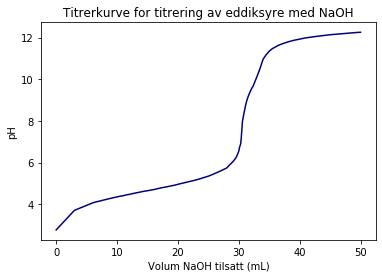

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('Datafiler/titrering.txt', skiprows = 2, delimiter = ',')

volum = data[:,0]     # mL
pH = data[:,1]           

plt.plot(volum, pH, color = 'navy')
plt.title('Titrerkurve for titrering av eddiksyre med NaOH')
plt.ylabel('pH')
plt.xlabel('Volum NaOH tilsatt (mL)')
plt.show()